# Prediction of churn rate for telecom users

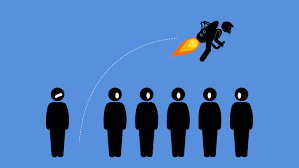

![](Customerschurnimage.png)

In [378]:
#IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [379]:
#READING THE FILE
df=pd.read_csv('C:\\Users\\user\\Downloads\\telecom_users.csv')

In [380]:
#FIRST FIVE ROWS OF DATA
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [381]:
#NO.OF ROWS AND COLUMNS
df.shape

(5986, 22)

In [382]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [383]:
#CHECKING DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [384]:
df=df.drop(['Unnamed: 0','customerID'],axis=1)
df=df.replace('No',0)
df=df.replace('Yes',1)
df=df.replace('No internet service',0)

In [385]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [386]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [387]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
0              1291
Name: InternetService, dtype: int64

In [388]:
df['InternetService']=df['InternetService'].replace('Fiber optic',2)
df['InternetService']=df['InternetService'].replace('DSL',3)

In [389]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [390]:
df['Contract']=df['Contract'].replace('Month-to-month',1)
df['Contract']=df['Contract'].replace('Two year',24)
df['Contract']=df['Contract'].replace('One year',12)

In [391]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [392]:
df['PaymentMethod']=df['PaymentMethod'].replace('Electronic check',1)
df['PaymentMethod']=df['PaymentMethod'].replace('Mailed check',2)
df['PaymentMethod']=df['PaymentMethod'].replace('Bank transfer (automatic)',3)
df['PaymentMethod']=df['PaymentMethod'].replace('Credit card (automatic)',4)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 4)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)

In [393]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88.15,3973.2,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,1,0,0,0,4,1,0,3,0,0,0,0,0,1,1,1,1,55.90,238.5,0
4,1,0,0,0,2,1,0,3,1,0,1,0,0,0,1,0,1,53.45,119.5,0


In [394]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [406]:
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [401]:
df['TotalCharges'].value_counts()

19      61
20      59
69      38
70      31
45      29
        ..
2791     1
6885     1
738      1
734      1
2067     1
Name: TotalCharges, Length: 3508, dtype: int64

In [408]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
total_charge = df['TotalCharges']

In [409]:
for i in range(0, len(df)-1):
    total_charge[i] = int(total_charge[i])
df['TotalCharges'] = df['TotalCharges'].astype(int)

<ipython-input-409-439e908c9b46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charge[i] = int(total_charge[i])


In [410]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24,1734,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88,3973,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74,2869,1
3,1,0,0,0,4,1,0,3,0,0,0,0,0,1,1,1,1,55,238,0
4,1,0,0,0,2,1,0,3,1,0,1,0,0,0,1,0,1,53,119,0


In [411]:
df.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int32
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int32
TotalCharges        int32
Churn               int64
dtype: object

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int64
 6   MultipleLines     5986 non-null   int32
 7   InternetService   5986 non-null   int64
 8   OnlineSecurity    5986 non-null   int64
 9   OnlineBackup      5986 non-null   int64
 10  DeviceProtection  5986 non-null   int64
 11  TechSupport       5986 non-null   int64
 12  StreamingTV       5986 non-null   int64
 13  StreamingMovies   5986 non-null   int64
 14  Contract          5986 non-null   int64
 15  PaperlessBilling  5986 non-null   int64
 16  PaymentMethod     5986 non-null   int64
 17  MonthlyCharges    5986 non-null  

<AxesSubplot:xlabel='Partner', ylabel='MonthlyCharges'>

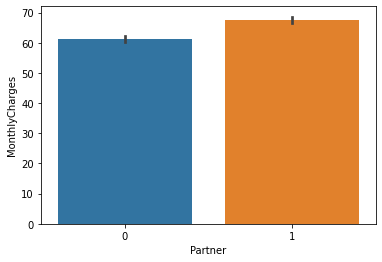

In [413]:
sns.barplot(x='Partner', y='MonthlyCharges', data=df)

Text(0.5, 0, 'female-male')

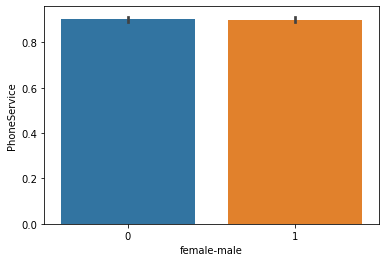

In [414]:
sns.barplot(x='gender',y='PhoneService',data=df)
plt.xlabel('female-male')

Text(0.5, 0, 'Non Senior-Senior')

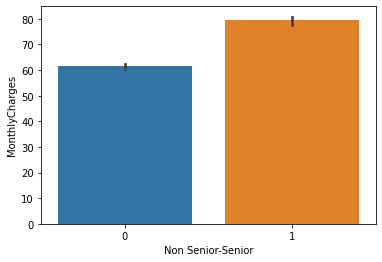

In [415]:
sns.barplot(x='SeniorCitizen',y='MonthlyCharges',data=df)
plt.xlabel('Non Senior-Senior')

Text(0.5, 0, 'No Internet - DSL - Fiber optic')

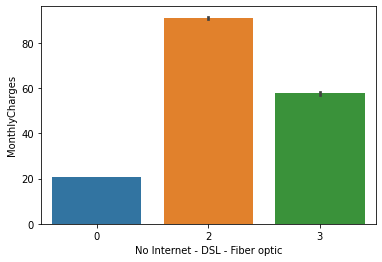

In [416]:
sns.barplot(x='InternetService', y='MonthlyCharges', data=df)
plt.xlabel('No Internet - DSL - Fiber optic')

Prediction

In [417]:
corr = df.corr()
corr.T

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,-0.000853,-0.000642,-0.022042,-0.018858,-0.004975,-0.010327,-0.009585,-0.008748,-0.002198,-0.013990,-0.007894,-0.014566,-0.003661,-0.009548
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.132999,0.091977,-0.037615,0.063561,0.061565,-0.061045,0.102519,0.116841,-0.149106,0.155691,-0.095515,0.219351,0.093807,0.150097
Partner,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,0.149325,-0.005076,0.153067,0.149407,0.152803,0.125468,0.130013,0.120763,0.299910,-0.018037,0.141066,0.104010,0.321348,-0.146840
Dependents,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.022399,-0.085301,0.085138,0.021946,0.009334,0.067460,-0.018705,-0.038750,0.245775,-0.112405,0.135491,-0.115946,0.062692,-0.160204
tenure,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.339181,0.036685,0.331981,0.358248,0.364085,0.329410,0.284979,0.297389,0.669871,0.006569,0.333857,0.256963,0.827756,-0.348469
PhoneService,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,0.284667,-0.327669,-0.089481,-0.049382,-0.072536,-0.090169,-0.022703,-0.030394,0.005412,0.021340,-0.008743,0.250874,0.117165,0.009421
MultipleLines,-0.000853,0.132999,0.149325,-0.022399,0.339181,0.284667,1.000000,0.068693,0.103793,0.209348,0.203705,0.105362,0.253013,0.262018,0.111371,0.169139,0.035500,0.494639,0.475213,0.036342
InternetService,-0.000642,0.091977,-0.005076,-0.085301,0.036685,-0.327669,0.068693,1.000000,0.385570,0.357051,0.348838,0.384743,0.319535,0.329277,-0.158931,0.213808,-0.046947,0.501225,0.258309,0.115797
OnlineSecurity,-0.022042,-0.037615,0.153067,0.085138,0.331981,-0.089481,0.103793,0.385570,1.000000,0.286817,0.283300,0.352356,0.187675,0.198972,0.244694,0.004057,0.155867,0.303558,0.417388,-0.174301
OnlineBackup,-0.018858,0.063561,0.149407,0.021946,0.358248,-0.049382,0.209348,0.357051,0.286817,1.000000,0.307406,0.289065,0.283627,0.283952,0.153415,0.124097,0.093187,0.445699,0.506819,-0.082648


In [418]:
df.shape

(5986, 20)

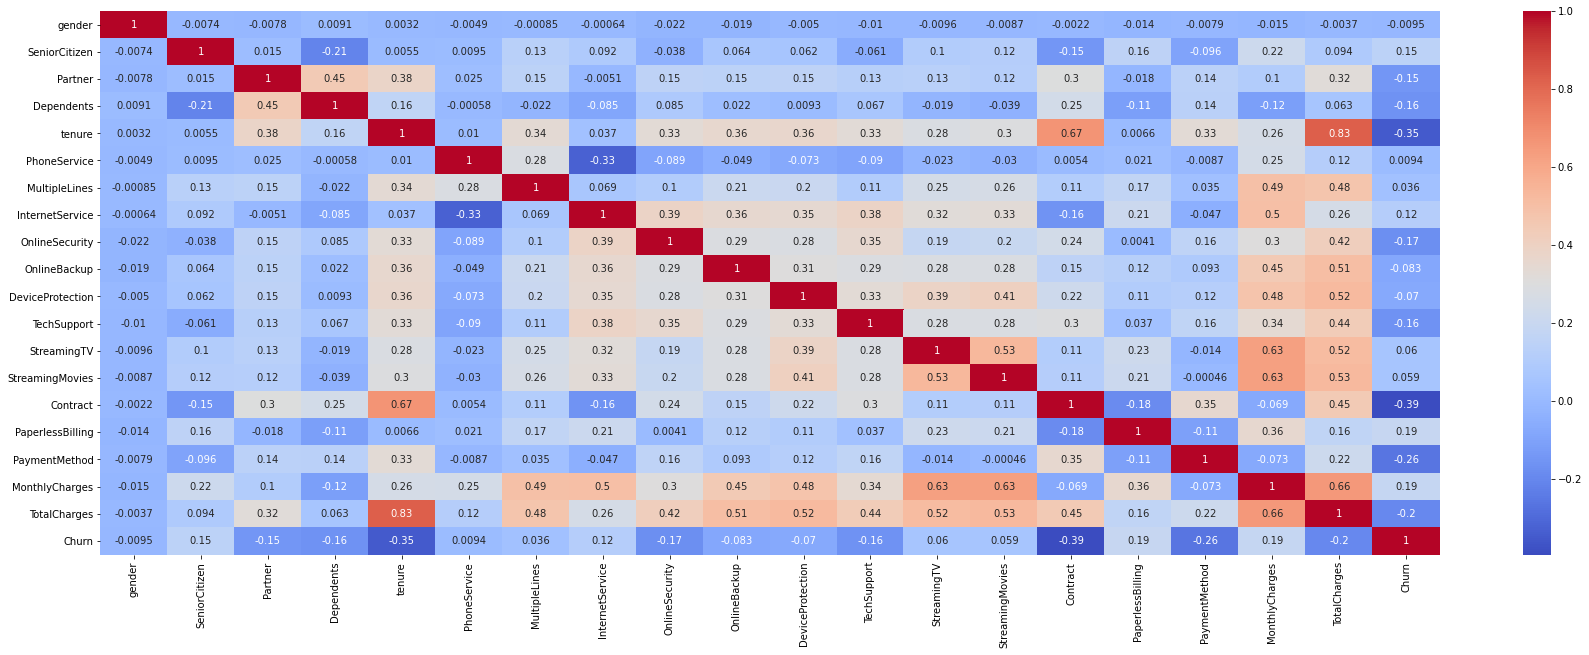

In [419]:
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [421]:
df['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [422]:
import seaborn as sns

<AxesSubplot:xlabel='Churn', ylabel='count'>

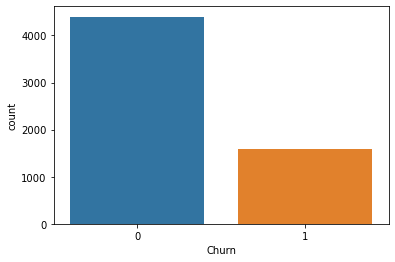

In [423]:
sns.countplot(x='Churn',data=df)

In [424]:
X=df.drop('Churn',axis=1)
Y=df.Churn

In [425]:
from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import NearMiss

In [426]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [427]:
X_res.shape,y_res.shape

((8152, 19), (8152,))

In [428]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4399, 1: 1587})
Resampled dataset shape Counter({0: 4076, 1: 4076})


In [429]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size=0.20, random_state=10)

# Logestic Regression

In [430]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
prediction_lr = logistic.predict(X_test)
print(classification_report(Y_test,prediction_lr))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       802
           1       0.82      0.83      0.83       829

    accuracy                           0.82      1631
   macro avg       0.82      0.82      0.82      1631
weighted avg       0.82      0.82      0.82      1631



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DECISION TREE

In [431]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
prediction_dt = tree.predict(X_test)
print(classification_report(Y_test, prediction_dt))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       802
           1       0.80      0.84      0.82       829

    accuracy                           0.81      1631
   macro avg       0.81      0.81      0.81      1631
weighted avg       0.81      0.81      0.81      1631



# RANDOM FOREST

In [432]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
prediction_rf = forest.predict(X_test)
print(classification_report(Y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       802
           1       0.84      0.88      0.86       829

    accuracy                           0.86      1631
   macro avg       0.86      0.86      0.86      1631
weighted avg       0.86      0.86      0.86      1631

